### Homework 2020/11/01, Roger Wang

<img style="float: left;" src="mission_01.png" width="15%"><br>
<br>
請接續11/1 完成的 Lab Mission 3計算觀測站ＡＱＩ的年度平均 、標準差 與 變異數 。

In [1]:
import pandas as pd
df = pd.read_csv('hukou_aqi_2019.csv', index_col=0)
print('AQI 年度平均：{}'.format(round(df['AQI'].mean(),2)))
print('AQI 年度標準差：{}'.format(round(df['AQI'].std(),2)))
print('AQI 年度變異數：{}'.format(round(df['AQI'].std()**2,2)))

AQI 年度平均：61.63
AQI 年度標準差：85.6
AQI 年度變異數：7327.35


<img style="float: left;" src="mission_02.png" width="20%"><br>
<br>
接續01 ，為探索季節/月份因素，新增"季度"欄位，並計算ＡＱＩ的 季度平均及月份平均

In [2]:
df1 = df.copy()
# df1['季']=1
def get_season(row):
    if row['月']<=3:
        return 1
    elif row['月']>=4 and row['月']<=6:
        return 2
    elif row['月']>=7 and row['月']<=9:
        return 3
    else:
        return 4


df1['季'] = df1.apply(lambda row:get_season(row), axis=1)

aqi_season = df1.groupby(by='季')['AQI'].mean()
aqi_month = df1.groupby(by='月')['AQI'].mean()
display(aqi_season)
display(aqi_month)

季
1    65.993806
2    65.640236
3    52.075867
4    62.961875
Name: AQI, dtype: float64

月
1     63.397970
2     61.696488
3     72.471089
4     72.627250
5     67.627483
6     56.277396
7     46.015182
8     46.309973
9     64.339344
10    70.573172
11    58.040611
12    60.113091
Name: AQI, dtype: float64

<img style="float: left;" src="mission_03.png" width="15%"><br>
<br>

接續02 ，請利用Matplotlib 套件，繪製ＡＱＩ的 季 、 月均線狀圖 ，並以年均值為水平虛線閥值線 。

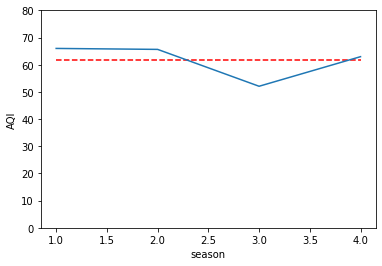

In [7]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.ylim(0, 80)
plt.xlabel('season')
plt.ylabel('AQI')
plt.plot(aqi_season.index, aqi_season.values)
#add a horizontal line
plt.hlines(df['AQI'].mean(), xmin=1, xmax=4, colors='r',
           linestyle='--')

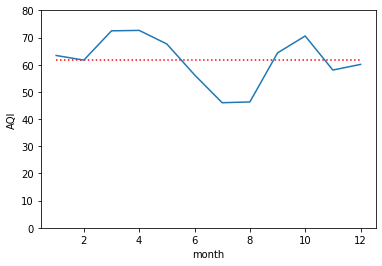

In [6]:
plt.ylim(0, 80)
plt.xlabel('month')
plt.ylabel('AQI')
plt.plot(aqi_month.index, aqi_month.values)
#add a horizontal line
plt.hlines(df['AQI'].mean(), xmin=1, xmax=12, colors='r', 
           linestyle='dotted')